# Image Resizing

## Table of Contents
1. [Introduction](#Introduction)
2. [Import Necessary Libraries](#Import-Necessary-Libraries)
3. [Reading the Image](#Reading-the-Image)
4. [Plotting the Image and Its Histogram](#Plotting-the-Image-and-Its-Iistogram)
5. [Upsampling Techniques](#Upsampling-Techniques)
    1. [Nearest Neighbor Upsampling (Using OpenCV)](#Nearest-Neighbor-Upsampling-(Using-OpenCV))
    2. [Bilinear Interpolation Upsampling (Using OpenCV)](#Bilinear-Interpolation-Upsampling-(Using-OpenCV))
    3. [Custom Upsampling (Using Pixel Replication from Scratch)](#Custom-Upsampling-(Using-Pixel-Replication-from-Scratch))
6. [Visual Comparison of Upsampled Images](#Visual-Comparison-of-Upsampled-Images)
7. [Downsampling Techniques](#Downsampling-Techniques)
    1. [Nearest Neighbor Downsampling (Using OpenCV)](#Nearest-Neighbor-Downsampling-(Using-OpenCV))
    2. [Bilinear Interpolation Downsampling (Using OpenCV)](#Bilinear-Interpolation-Downsampling-(Using-OpenCV))
    3. [Area Interpolation Downsampling (Using OpenCV)](#Area-Interpolation-Downsampling-(Using-OpenCV))
8. [Visual Comparison of Downsampled Images](#Visual-Comparison-of-Downsampled-Images)

## Introduction
In this notebook, we will explore different techniques for image upsampling and downsampling using OpenCV. Image upsampling involves increasing the resolution of an image, while downsampling involves reducing the resolution. We will use three upsampling methods, including a custom method implemented from scratch, and three downsampling methods. The techniques covered are:

- Nearest Neighbor Upsampling (Using OpenCV)
- Bilinear Interpolation Upsampling (Using OpenCV)
- Custom Pixel Replication Upsampling (from scratch)
- Nearest Neighbor Downsampling (Using OpenCV)
- Bilinear Interpolation Downsampling (Using OpenCV)
- Area Interpolation Downsampling (Using OpenCV)

We will compare the visual quality of the upsampled and downsampled images and plot their histograms.


## Import Necessary Libraries

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Reading the Image 

In [ ]:
# Read the image
image = cv2.imread('adel_shaklll.jpg')

# Convert image from BGR (OpenCV format) to RGB (Matplotlib format)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

## Plotting the Image and Its Histogram

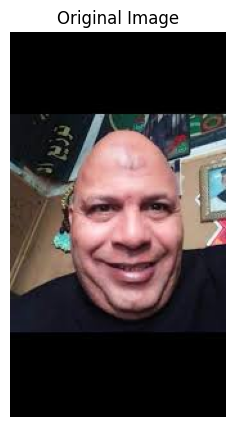

In [3]:
# Plot the image
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title('Original Image')
plt.axis('off')
plt.show()

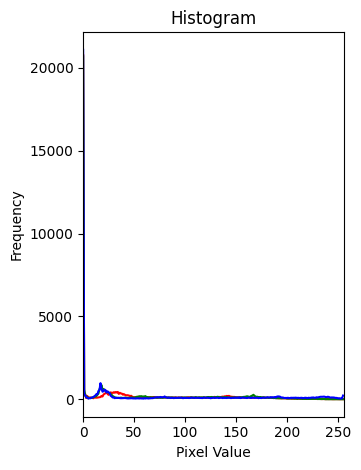

In [4]:
# Compute and plot the histogram
plt.subplot(1, 2, 2)
colors = ('r', 'g', 'b')
for i, color in enumerate(colors):
    hist = cv2.calcHist([image], [i], None, [256], [0, 256])
    plt.plot(hist, color=color)
    plt.xlim([0, 256])

plt.title('Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

## Upsampling Techniques

### Nearest Neighbor Upsampling (Using OpenCV)

In [5]:
# Perform upsampling using Nearest Neighbor method
upsampled_nearest = cv2.resize(image_rgb, None, fx=2, fy=2, interpolation=cv2.INTER_NEAREST)

### Bilinear Interpolation Upsampling (Using OpenCV)

In [6]:
# Perform upsampling using Bilinear Interpolation method
upsampled_bilinear = cv2.resize(image_rgb, None, fx=2, fy=2, interpolation=cv2.INTER_LINEAR)

### Custom Upsampling (Using Pixel Replication from Scratch)

In [7]:
# Perform upsampling using custom Pixel Replication method (from scratch)
def upsample_custom(image, scale):
    height, width = image.shape[:2]
    new_height, new_width = int(height * scale), int(width * scale)
    
    # Create an empty array for the upsampled image
    upsampled_image = np.zeros((new_height, new_width, 3), dtype=np.uint8)
    
    for i in range(new_height):
        for j in range(new_width):
            # Find the corresponding pixel in the original image
            orig_i = i // scale
            orig_j = j // scale
            upsampled_image[i, j] = image[orig_i, orig_j]
    
    return upsampled_image

# Upsample the image by a scale of 2
upsampled_custom = upsample_custom(image_rgb, 2)

### Visual Comparison of Upsampled Images

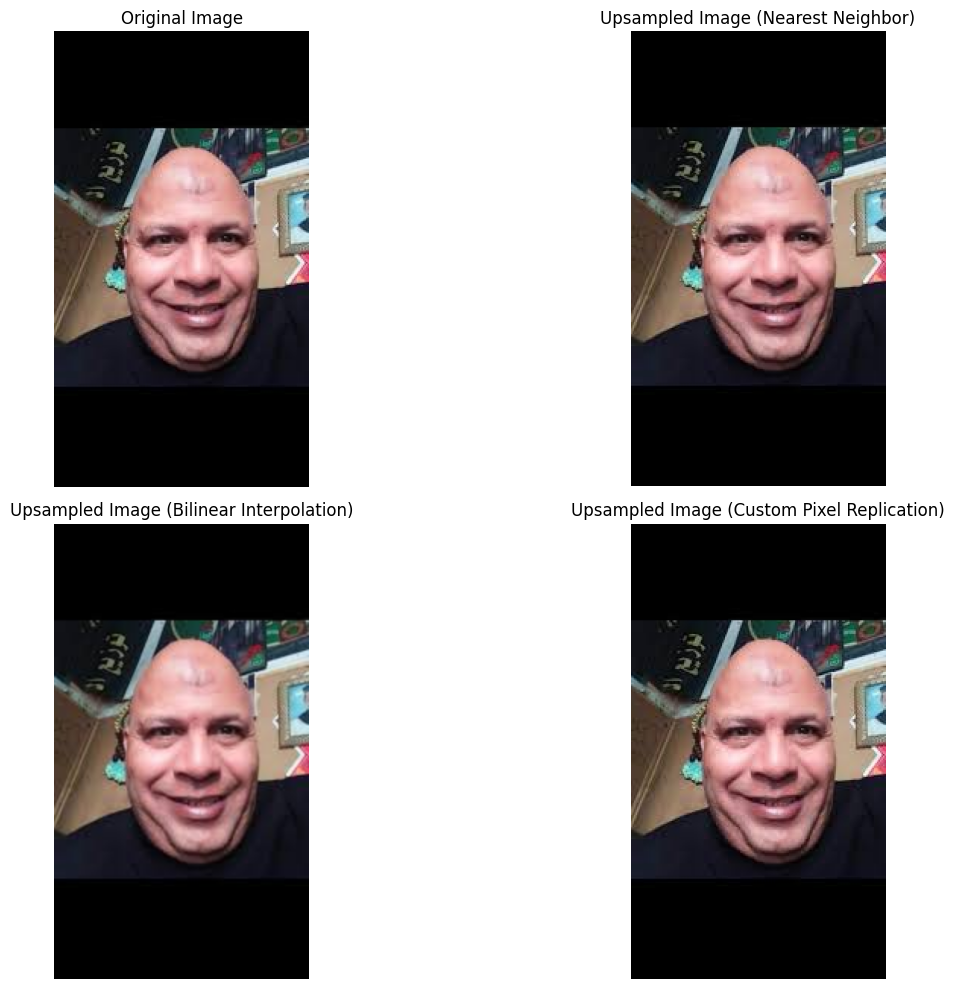

In [8]:
# Plot the original and upsampled images for visual comparison
plt.figure(figsize=(15, 10))

# Display the original image
plt.subplot(2, 2, 1)
plt.imshow(image_rgb)
plt.title('Original Image')
plt.axis('off')

# Display the upsampled image using Nearest Neighbor method
plt.subplot(2, 2, 2)
plt.imshow(upsampled_nearest)
plt.title('Upsampled Image (Nearest Neighbor)')
plt.axis('off')

# Display the upsampled image using Bilinear Interpolation method
plt.subplot(2, 2, 3)
plt.imshow(upsampled_bilinear)
plt.title('Upsampled Image (Bilinear Interpolation)')
plt.axis('off')

# Display the upsampled image using custom method
plt.subplot(2, 2, 4)
plt.imshow(upsampled_custom)
plt.title('Upsampled Image (Custom Pixel Replication)')
plt.axis('off')

plt.tight_layout()
plt.show()

## Downsapling

### Nearest Neighbor Downsampling (Using OpenCV)

In [9]:
# Perform downsampling using Nearest Neighbor method
downsampled_nearest = cv2.resize(image_rgb, None, fx=0.5, fy=0.5, interpolation=cv2.INTER_NEAREST)

### Bilinear Interpolation Downsampling (Using OpenCV)

In [10]:
# Perform downsampling using Bilinear Interpolation method
downsampled_bilinear = cv2.resize(image_rgb, None, fx=0.5, fy=0.5, interpolation=cv2.INTER_LINEAR)

### Area Interpolation Downsampling (Using OpenCV)

In [11]:
# Perform downsampling using Area Interpolation method (using OpenCV)
downsampled_area = cv2.resize(image_rgb, None, fx=0.5, fy=0.5, interpolation=cv2.INTER_AREA)

### Visual Comparison of Downsampled Images

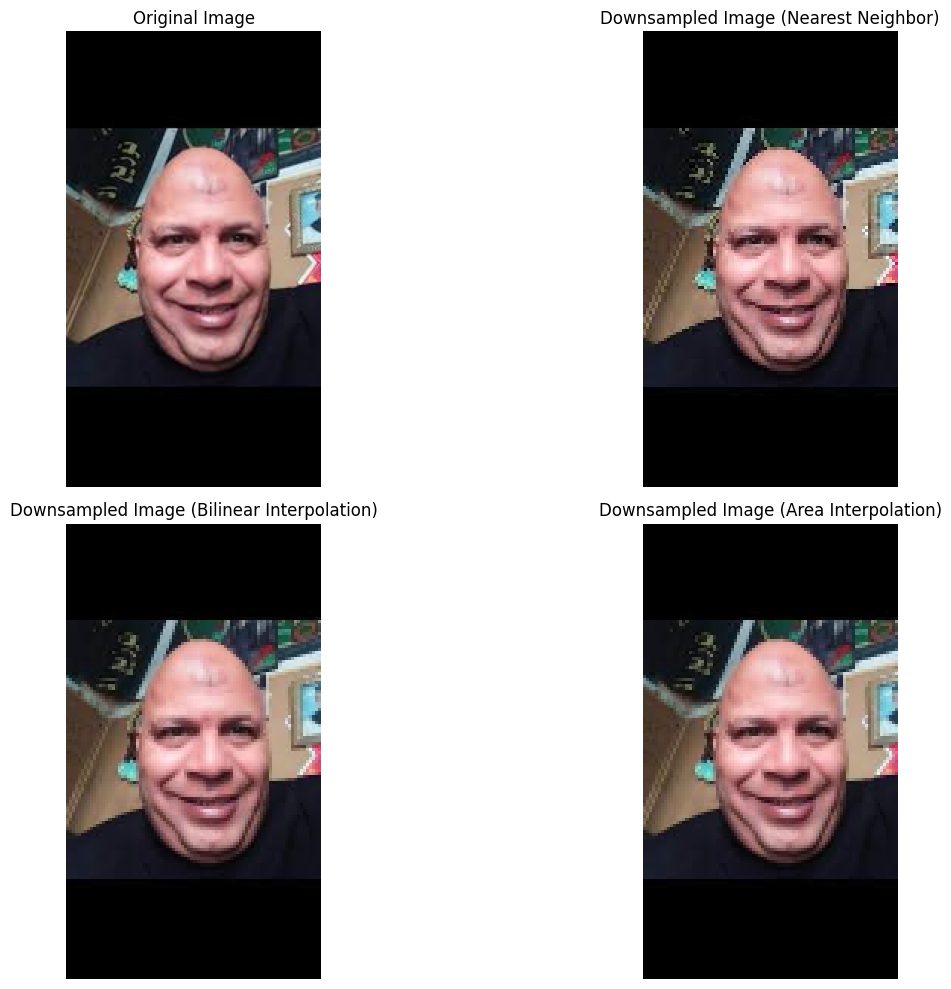

In [12]:
# Plot the original and downsampled images for visual comparison
plt.figure(figsize=(15, 10))

# Display the original image
plt.subplot(2, 2, 1)
plt.imshow(image_rgb)
plt.title('Original Image')
plt.axis('off')

# Display the downsampled image using Nearest Neighbor method
plt.subplot(2, 2, 2)
plt.imshow(downsampled_nearest)
plt.title('Downsampled Image (Nearest Neighbor)')
plt.axis('off')

# Display the downsampled image using Bilinear Interpolation method
plt.subplot(2, 2, 3)
plt.imshow(downsampled_bilinear)
plt.title('Downsampled Image (Bilinear Interpolation)')
plt.axis('off')

# Display the downsampled image using Area Interpolation method
plt.subplot(2, 2, 4)
plt.imshow(downsampled_area)
plt.title('Downsampled Image (Area Interpolation)')
plt.axis('off')

plt.tight_layout()
plt.show()